## Import Library

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score

## Baca dataset

In [8]:
data = pd.read_csv('new_train.csv')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


## A. Supervised Learning Support Vector Classifier (dari SVM)

### A1 Classifier menggunakan Radom Forest

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [10]:
#Pisahkan fitur (X) dan label (y)
X = data[['age','duration']]
y = data['y'] 

In [11]:
# Bagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Inisialisasi model SVC dan latih model SVC dengan data pelatihan
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [13]:
# Membuat objek RandomForestClassifier dengan 50 pohon keputusan dan seed (random state) 1
rfcl = RandomForestClassifier(n_estimators=50, random_state=1)

# Melatih model RandomForestClassifier menggunakan data latih
rfcl = rfcl.fit(X_train, y_train)


0.8638340920586748


Text(0.5, 1.0, 'Confusion Matrix (SVC)')

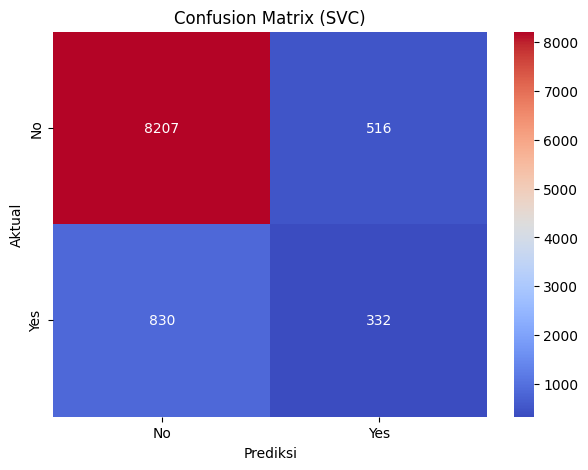

In [14]:
#Lakukan prediksi dengan SVC pada data pengujian
y_predict = rfcl.predict(X_test)
# Menghitung akurasi model terhadap data uji dan mencetaknya
print(rfcl.score(X_test, y_test))

# Menghitung matriks kebingungan (confusion matrix) dan mencetaknya
cm = metrics.confusion_matrix(y_test, y_predict)

# Membuat dataframe dari matriks kebingungan dan menampilkannya dalam bentuk heatmap
df_cm = pd.DataFrame(cm, index=[i for i in ["No", "Yes"]],
                  columns=[i for i in ["No", "Yes"]])
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True,cmap = 'coolwarm', fmt='g')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix (SVC)')

### CLassification Report

In [17]:

class_report_svc = classification_report(y_test, y_predict)

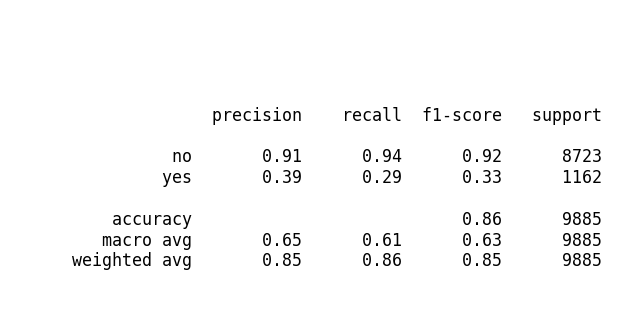

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.text(0.1, 0.1, class_report_svc, {'fontsize': 12}, fontproperties='monospace')
plt.axis('off')

plt.show()

### Plot Hasil Prediksi dan Target Asli dengan SVC

### Konversi label kelas ke kode warna numerik

In [19]:
color_map = {'yes': 'r', 'no': 'g'}
y_pred_colors = [color_map[label] for label in y_predict]
y_test_colors = [color_map[label] for label in y_test if label in color_map]

In [20]:
# Menghitung nilai precision, recall, dan F1-score dari model dan mencetaknya
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test,y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


ValueError: pos_label=1 is not a valid label. It should be one of ['no', 'yes']

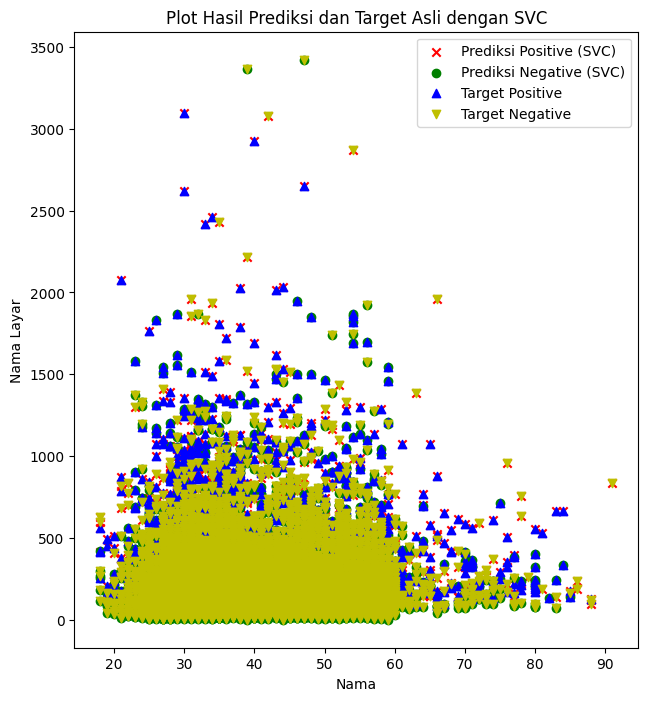

In [22]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)

# Titik-titik hasil prediksi SVC dengan warna berbeda (hijau untuk benar, merah untuk salah)
# Prediksi Positive (SVC)
plt.scatter(X_test[y_predict == 'yes']['age'], X_test[y_predict == 'yes']['duration'], c='r', marker='x', label='Prediksi Positive (SVC)')

# Prediksi Negative (SVC)
plt.scatter(X_test[y_predict == 'no']['age'], X_test[y_predict == 'no']['duration'], c='g', marker='o', label='Prediksi Negative (SVC)')

# Titik-titik target asli dengan warna berbeda (biru untuk Positive, kuning untuk Negative)
# Target Positive
plt.scatter(X_test[y_test == 'yes']['age'], X_test[y_test == 'yes']['duration'], c='b', marker='^', label='Target Positive')

# Target Negative
plt.scatter(X_test[y_test == 'no']['age'], X_test[y_test == 'no']['duration'], c='y', marker='v', label='Target Negative')

plt.xlabel('Nama')
plt.ylabel('Nama Layar')
plt.title('Plot Hasil Prediksi dan Target Asli dengan SVC')
plt.legend(loc='best')
plt.show()

### Implementasi Metode K-Nearest Neighbors (KNN)


### Inisialisasi model KNN

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)

### Latih model KNN pada data pelatihan

In [24]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Lakukan prediksi dengan KNN pada data pengujian

In [25]:
y_pred_knn = knn.predict(X_test)

### Hitung confusion matrix dengan KNN

In [26]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

### Hitung classification report dengan KNN

In [27]:
class_report_knn = classification_report(y_test, y_pred_knn)

### Confusion Matrix

In [28]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)


### Visualisasi Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix (KNN)')

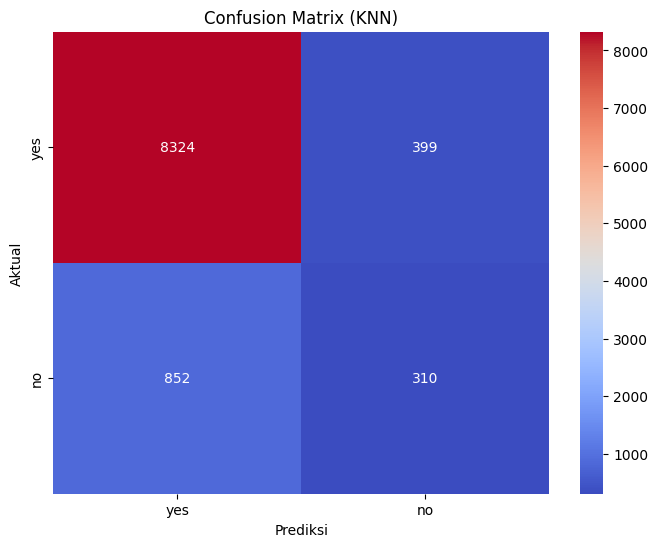

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='coolwarm', xticklabels=['yes', 'no'], yticklabels=['yes', 'no'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix (KNN)')

### Classification Report

In [30]:
class_report_knn = classification_report(y_test, y_pred_knn)

### Visualisasi Classification Reporthow()


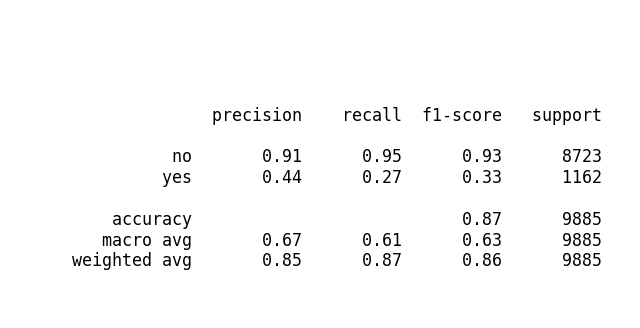

In [31]:
plt.figure(figsize=(8, 4))
plt.text(0.1, 0.1, class_report_knn, {'fontsize': 12}, fontproperties='monospace')
plt.axis('off')

plt.show()

### Plot Hasil Prediksi dan Target Asli dengan KNN

### Visualisasi Data untuk model KNN

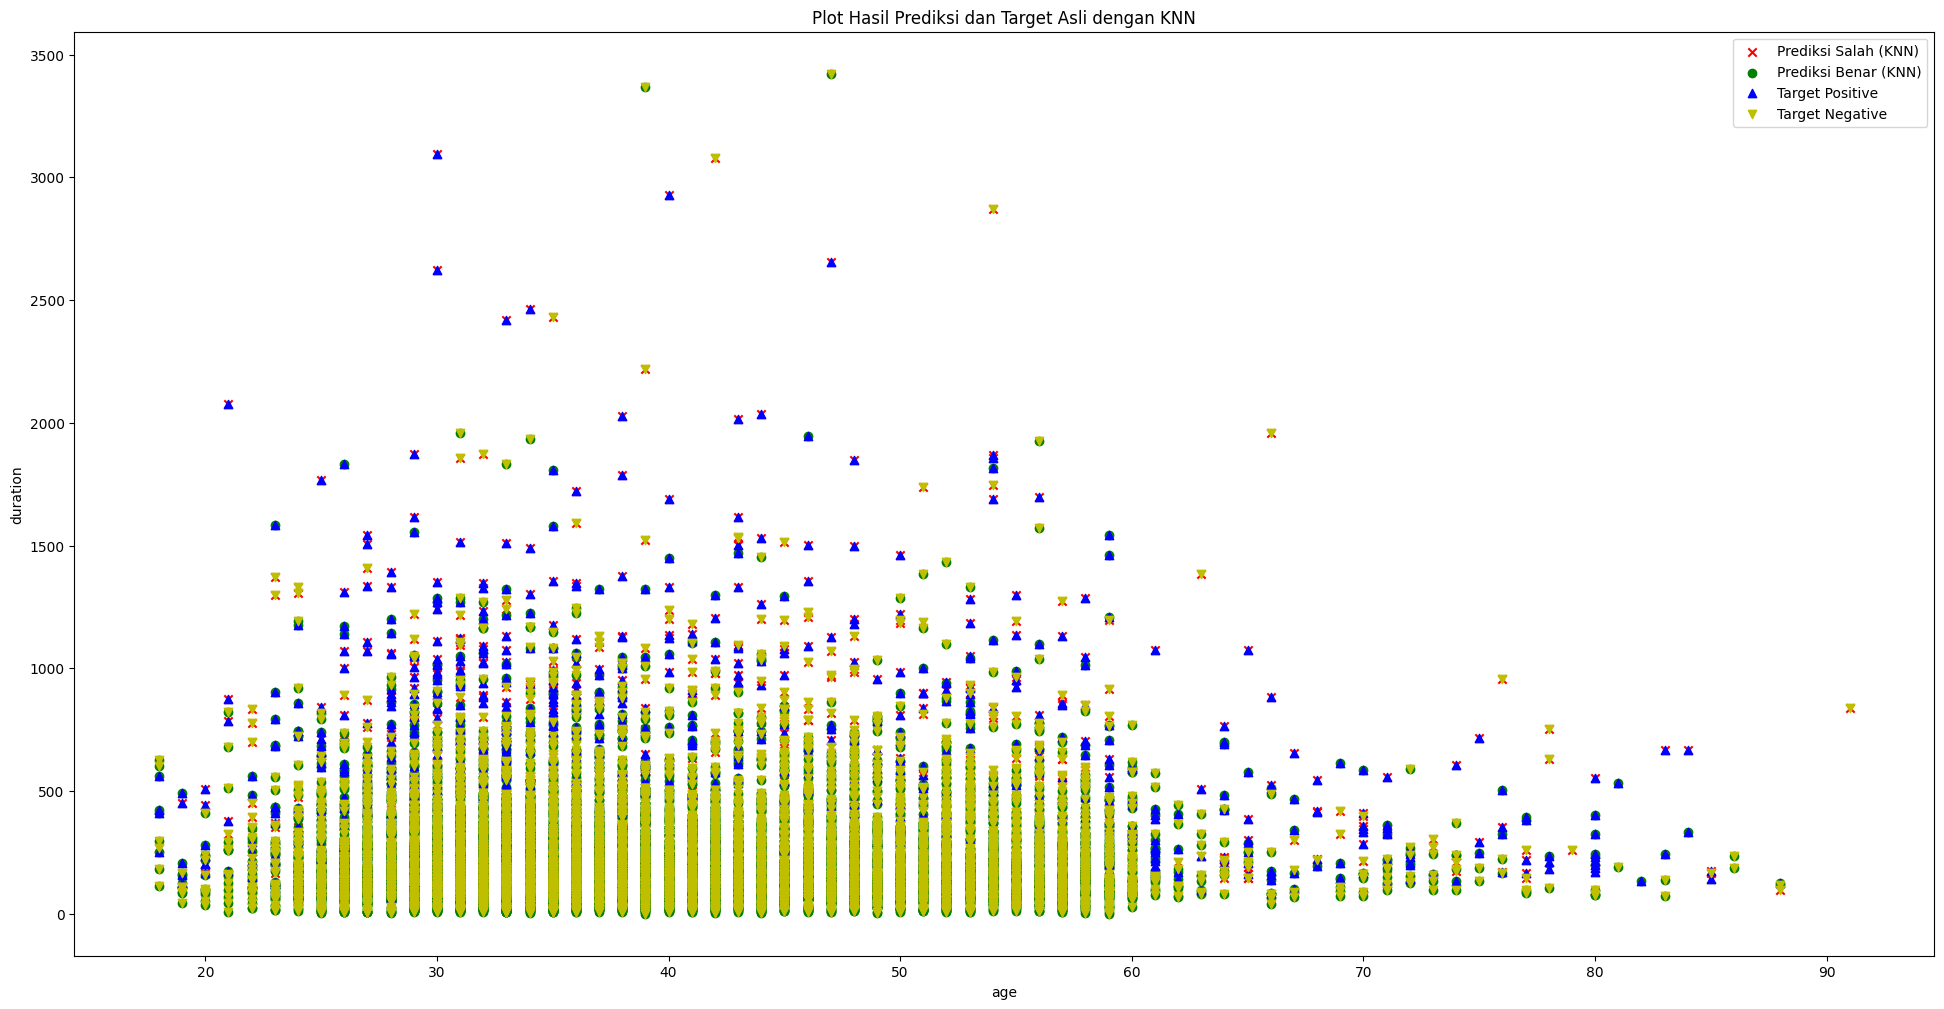

In [32]:
plt.figure(figsize=(24, 12))

# Titik-titik hasil prediksi KNN dengan warna berbeda (hijau untuk benar, merah untuk salah)
# Prediksi Positive (KNN)
plt.scatter(X_test[y_pred_knn == 'yes']['age'], X_test[y_pred_knn == 'yes']['duration'], c='r', marker='x', label='Prediksi Salah (KNN)')

# Prediksi Negative (KNN)
plt.scatter(X_test[y_pred_knn == 'no']['age'], X_test[y_pred_knn == 'no']['duration'], c='g', marker='o', label='Prediksi Benar (KNN)')

# Titik-titik target asli dengan warna berbeda (biru untuk Positive, kuning untuk Negative)
# Target Positive
plt.scatter(X_test[y_test == 'yes']['age'], X_test[y_test == 'yes']['duration'], c='b', marker='^', label='Target Positive')

# Target Negative
plt.scatter(X_test[y_test == 'no']['age'], X_test[y_test == 'no']['duration'], c='y', marker='v', label='Target Negative')

plt.xlabel('age')
plt.ylabel('duration')
plt.title('Plot Hasil Prediksi dan Target Asli dengan KNN')
plt.legend(loc='best')
plt.show()

### Linear Regression

### Pilih fitur dan label

In [41]:
X = data[['age','duration']]

### Gunakan 'UserName' sebagai label

In [42]:
y = data['duration']

### Bagi dataset menjadi data latih dan data uji

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Membangun model Linear Regression

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Melakukan prediksi

In [45]:
y_pred = model.predict(X_test)

### Menghitung MAE, MSE, RMSE, dan R2-Score

In [46]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse ** 0.5)  
r2 = r2_score(y_test, y_pred)

### Tampilkan hasil

In [47]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2-Score:", r2)

MAE: 4.186557006096144e-13
MSE: 4.149676297378499e-25
RMSE: 6.441798116503264e-13
R2-Score: 1.0


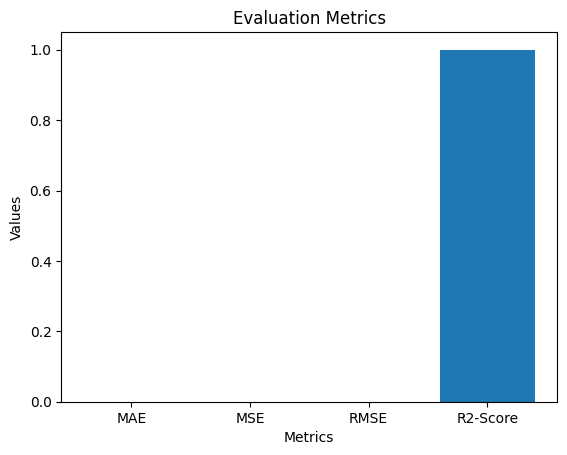

In [48]:
# Data metrik
metrics = ["MAE", "MSE", "RMSE", "R2-Score"]
values = [mae, mse, rmse, r2]
# Plot bar untuk menampilkan metrik
plt.bar(metrics, values)
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Evaluation Metrics")
plt.show()

### Plot Hasil Prediksi dan Target Asli

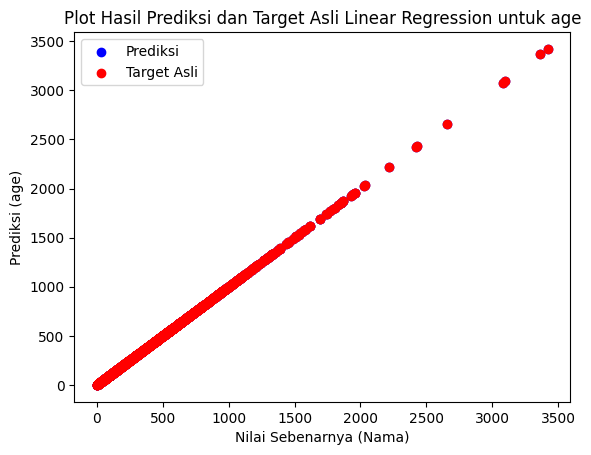

In [50]:
plt.scatter(y_test, y_pred, c='blue', label='Prediksi')
plt.scatter(y_test, y_test, c='red', label='Target Asli')
plt.xlabel("Nilai Sebenarnya (Nama)")
plt.ylabel("Prediksi (age)")
plt.title("Plot Hasil Prediksi dan Target Asli Linear Regression untuk age")
plt.legend()
plt.show()

## B. Unsupervised Learning

###  B1. Implementasi Metode K-Means: Menggunakan kolom UserName (kolom ke-0) dan educational-num (kolom ke-4)

In [52]:
X = data.iloc[:, [5, 4]].values 

### Inisialisasi list untuk menyimpan nilai WCSS tiap kelompok

In [53]:
wcss = []  

### Buat loop untuk melatih algoritma K-Means dengan berbagai jumlah kluster (K)

In [54]:
for k in range(5, 4):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

### Buat grafik Elbow Method

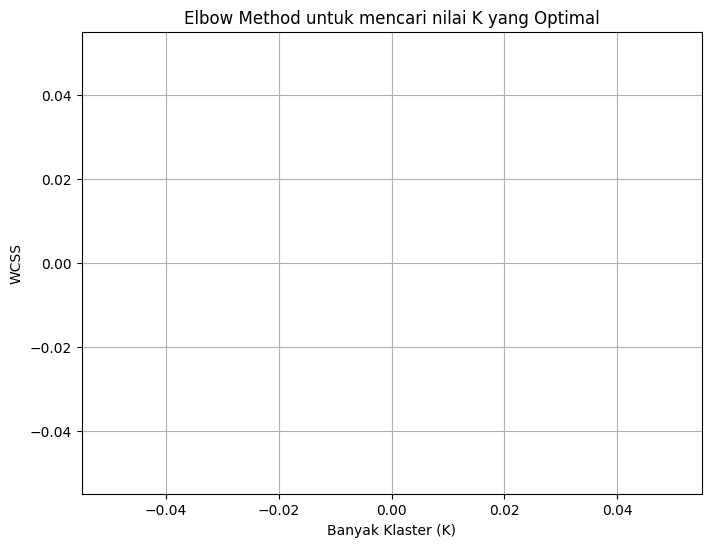

In [55]:
plt.figure(figsize=(8, 6))
plt.plot(range(5, 4), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Inisialisasi model K-Means dengan nilai K yang sesuai

k = 3 
kmeans = KMeans(k, n_init=10)
# Pilih hanya kolom "UserName" dan "ScreenName" sebagai fitur X.

X = data[["age", "duration"]]
# Fit model K-Means pada dataset

kmeans.fit(X)

In [59]:
# Prediksi cluster untuk setiap data point dalam dataset

predicted_clusters = kmeans.predict(X)

In [61]:
# Tambahkan kolom "cluster" ke dataset

data["cluster"] = predicted_clusters

### B2. Evaluasi Cluster yang telah diprediksi

### a. Unlabeled Dataset (Dataset Tanpa Label)

In [64]:
# predicted_clusters adalah hasil clustering yang telah diprediksi

ss_score = silhouette_score(X, predicted_clusters)
print(f"Silhouette Score: {ss_score:.2f}")
db_index = davies_bouldin_score(X, predicted_clusters)
print(f"Davies-Bouldin Index: {db_index:.2f}")
ch_index = calinski_harabasz_score(X, predicted_clusters)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.64
Davies-Bouldin Index: 0.55
Calinski-Harabasz Index: 58238.64


### b. Labeled Dataset (Dataset Dengan Label)

In [67]:
# true_labels adalah kolom yang berisi label asli dataset
true_labels = data['y']

In [68]:
# Menggantilah dengan nama dataset yang sesuai dan predicted_clusters yang sesuai

cross_tab = pd.crosstab(predicted_clusters, true_labels)
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
y         no   yes
row_0             
0       5648  1688
1        581   769
2      23009  1255 



In [71]:
# Adjusted Rand Index (ARI)

ari = adjusted_rand_score(true_labels, predicted_clusters)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): 0.21


In [74]:
# Normalized Mutual Information (NMI)

nmi_age = normalized_mutual_info_score(data['age'], predicted_clusters)
nmi_duration = normalized_mutual_info_score(data['duration'], predicted_clusters)

print(f"Normalized Mutual Information (NMI) for UserName: {nmi_age:.2f}")
print(f"Normalized Mutual Information (NMI) for ScreenName: {nmi_duration:.2f}")

Normalized Mutual Information (NMI) for UserName: 0.00
Normalized Mutual Information (NMI) for ScreenName: 0.19


In [77]:
# Fungsi HCV-M

kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster_mapped'] = kmeans.fit_predict(data[['age', 'duration']])

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


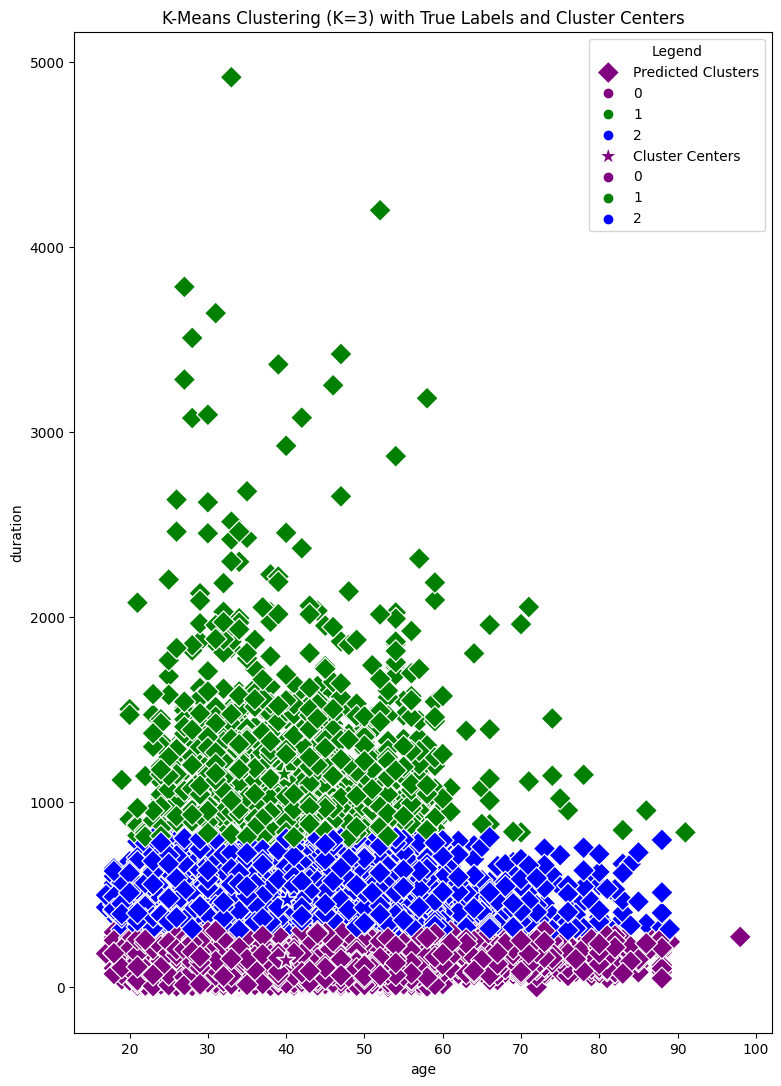

In [81]:
plt.figure(figsize=(9, 13))
colors = ["purple", "green", "blue"]

# Scatter plot hasil prediksi clustering
sns.scatterplot(data=data, x="age", y="duration", palette=colors,
                hue=data["cluster_mapped"], marker="D", s=130, label="Predicted Clusters")

# Tambahkan titik pusat cluster
cluster_centers = data.groupby("cluster_mapped").mean()
sns.scatterplot(data=cluster_centers, x=cluster_centers["age"], y=cluster_centers["duration"],
                palette=colors, hue=cluster_centers.index, marker="*", s=200, label="Cluster Centers")

plt.title("K-Means Clustering (K=3) with True Labels and Cluster Centers")
plt.xlabel("age")
plt.ylabel("duration")
plt.legend(title="Legend", loc="upper right")
plt.show()